### Case: WBTC

## Imports
Import the json, web3 and requests libraries. 

In [1]:
import json
from web3 import Web3
import requests



## Connecting to the Ethereum Network
Use the web3 library to create a connection to the Ethereum network using the Infura URL provided. We will then store the connection in a variable called 'web3' and use the `web3.isConnected()` method to check if the connection was successful.

In [2]:
infura_url= 'https://mainnet.infura.io/v3/[YOUR INFURA KEY]'
web3= Web3(Web3.HTTPProvider (infura_url))
web3.isConnected()

True

## Wrapped BTC contract specifics and connection

Use the web3 library to connect to a smart contract on the Ethereum network. Take the address of the smart contract from the variable 'sc_address' and the ABI from the file 'w_btcabi.json' and store the connection in a variable called 'wbtcContract'.

In [3]:
sc_address="0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599"
with open ("./w_btcabi.json") as f:
    abi= json.load (f)

In [4]:
wbtcContract = web3.eth.contract(address=sc_address, abi=abi)

## TVL - Market Cap

In the case of 1:1 bridge, the supply coincides with the locked value. To calculate it we will need to extract: 

* `supply`: The total number of tokens in circulation, which matches the total supply since it is pegged to Bitcoin. This is why the market cap and fully diluted market cap are the same, although not all tokens behave this way. 
* `decimals`: how many decimals to the left have to be calculated. 
* `price`: real time price of the token. 


#### Retrieving the Total Supply
Use the web3 library to retrieve the total supply of the smart contract stored in the variable 'wbtcContract'. This cell calls the 'totalSupply' function and store the result in the variable 'supply'. Finally, print the result of the 'supply' variable.

In [5]:
supply= wbtcContract.functions.totalSupply().call()
supply

24475657136141



#### Retrieving the Decimals
Call the 'decimals' function and store the result in the variable 'decimals' and print the result of the 'decimals' variable. We can see that the smart contract uses 8 decimals. 

In [6]:
decimals= wbtcContract.functions.decimals().call()
decimals

8

#### Retrieving the Price
Use the requests library to retrieve the price of the smart contract stored in the variable 'wbtcContract' from the CoinGecko API. Store the result in the variable 'price' and finally and print it.

In [7]:
url="https://api.coingecko.com/api/v3/simple/token_price/ethereum?contract_addresses=0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599&vs_currencies=USD"
response = requests.get(url)
data= response.json()
price = data["0x2260fac5e5542a773aa44fbcfedf7c193bc2c599"]["usd"]
price

19170.31

#### Calculating the market cap - TVL 
Use the variables 'supply' and 'decimals' to calculate the market cap and TVL of the smart contract. Store the result in the variable 'tvl' and finally print it.

In [8]:
tvl = (supply*10**-decimals)*price
tvl

4692059347.535352

## Comparision

Let's compare with information that is online.

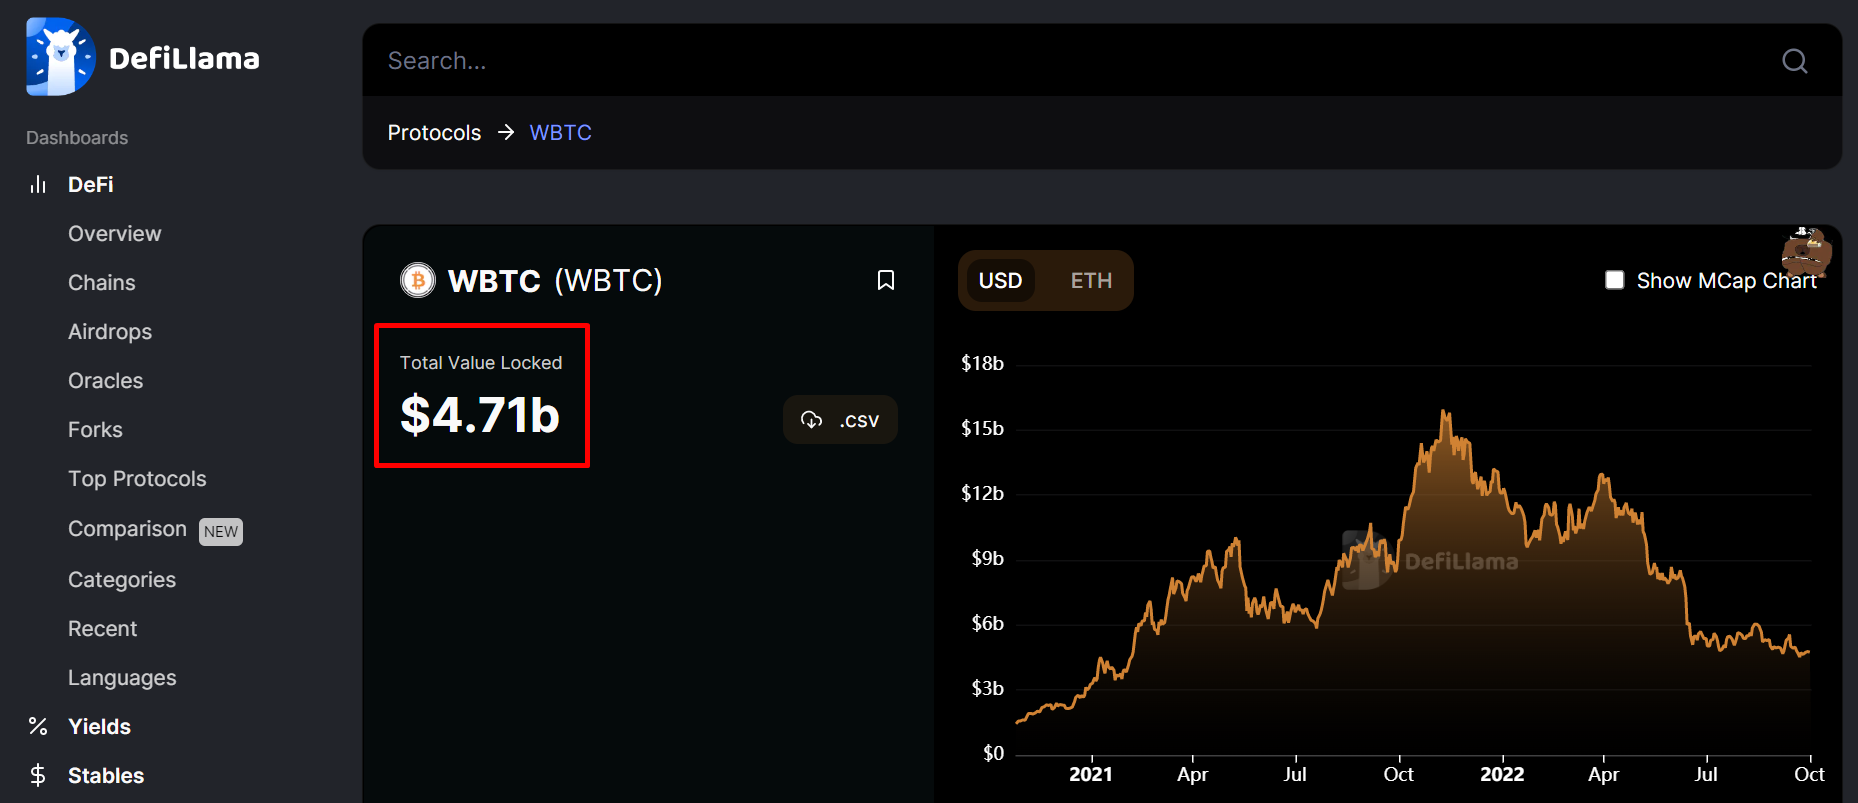

In [9]:
url="https://api.llama.fi/tvl/wbtc"
response = requests.get(url)
data= response.json()
data

4694629291.534647

## Retrieving All Functions of a Smart Contract
The code in this cell will use the 'wbtcContract' object to retrieve all the functions of the smart contract and print the list of functions. This will allow us to see all the available functions of the smart contract and use them as needed.

In [10]:
wbtcContract.all_functions()

[<Function mintingFinished()>,
 <Function name()>,
 <Function approve(address,uint256)>,
 <Function reclaimToken(address)>,
 <Function totalSupply()>,
 <Function transferFrom(address,address,uint256)>,
 <Function decimals()>,
 <Function unpause()>,
 <Function mint(address,uint256)>,
 <Function burn(uint256)>,
 <Function claimOwnership()>,
 <Function paused()>,
 <Function decreaseApproval(address,uint256)>,
 <Function balanceOf(address)>,
 <Function renounceOwnership()>,
 <Function finishMinting()>,
 <Function pause()>,
 <Function owner()>,
 <Function symbol()>,
 <Function transfer(address,uint256)>,
 <Function increaseApproval(address,uint256)>,
 <Function allowance(address,address)>,
 <Function pendingOwner()>,
 <Function transferOwnership(address)>]